In [2]:
import pandas as pd
import numpy as np

# For graph and plotting
import matplotlib.style
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Utility functions
from collections import Counter
import re

# For Machine learning models
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# For natural language processing
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load Data from csv (UC Irvine ML dataset respository)
data = pd.read_csv("drive/My Drive/spam_sms_data.csv", encoding = 'latin1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
# Drop unwanted columns/attributes
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)
data = data.rename(columns ={"v1":"Result", "v2":"Msg"})
data.head()

,Result,Msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Creating the dictionary
data.groupby('Result').describe()
acc_dic={}

In [9]:
# For counting number of ham and spam messages
data.Result.value_counts()

ham     4825
spam     747
Name: Result, dtype: int64

Text(0.5, 1.0, 'Spam and Ham categorization')

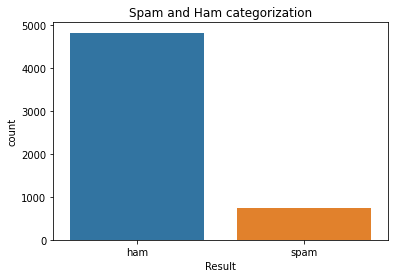

In [10]:
# Plotting graph for distribution of spam and ham messages
sns.countplot(x = "Result", data = data)
data.loc[:, 'Result'].value_counts()
plt.title('Spam and Ham categorization')

In [11]:
# Length is the feature which has been taken into consideration
data['length'] = data['Msg'].apply(len)
data.head()

,Result,Msg,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0c8c40f28>,
      dtype=object)

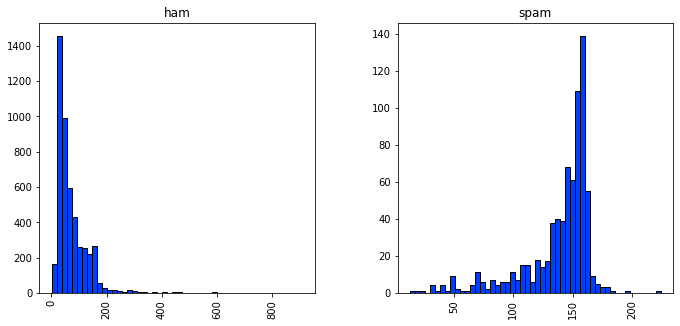

In [12]:
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
data.hist(column='length', by='Result', bins=50,figsize=(11,5))

In [13]:
#for counting frequently occurence of spam and ham.
count1 = Counter(" ".join(data[data['Result']=='ham']["Msg"]).split()).most_common(30)
data1 = pd.DataFrame.from_dict(count1)
data1 = data1.rename(columns={0: "words of ham", 1 : "count"})
count2 = Counter(" ".join(data[data['Result']=='spam']["Msg"]).split()).most_common(30)
data2 = pd.DataFrame.from_dict(count2)
data2 = data2.rename(columns={0: "words of spam", 1 : "count_"})


In [14]:
data1.head

<bound method NDFrame.head of    words of ham  count
0            to   1530
1           you   1458
2             I   1436
3           the   1019
4             a    969
5           and    738
6             i    736
7            in    734
8             u    645
9            is    638
10           my    619
11           me    537
12           of    498
13          for    475
14         that    398
15           it    375
16         your    373
17           on    352
18         have    346
19           at    333
20          not    320
21          are    319
22           be    314
23         will    291
24            2    284
25          get    281
26          can    279
27          I'm    278
28    &lt;#&gt;    276
29          but    275>

In [15]:
data2.head

<bound method NDFrame.head of    words of spam  count_
0             to     604
1              a     358
2           your     187
3           call     185
4             or     185
5            the     178
6              2     169
7            for     169
8            you     164
9             is     143
10          Call     136
11            on     135
12          have     128
13           and     119
14          from     116
15            ur     107
16          with     101
17             &      98
18             4      93
19            of      93
20          FREE      89
21        mobile      81
22           You      77
23           are      77
24           our      76
25            To      73
26         claim      73
27          Your      71
28             U      70
29           txt      68>

In [16]:
# Splitting of data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data['Msg'], data['Result'], test_size = 0.2, random_state = 37)
print ("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

X_train:  4457
X_test:  1115
y_train:  4457
y_test:  1115


In [17]:
# Removal of stopwords, punctuation marks etc.
nltk.download('stopwords')
corpus = []
for i in range(0, 5572):
    review = re.sub('[^a-zA-Z]', ' ', data['Msg'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
cv = CountVectorizer(max_features = 1500)
cv.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=1500, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [20]:
X_train_cv = cv.transform(X_train)
X_train_cv

<4457x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 49114 stored elements in Compressed Sparse Row format>

In [21]:
X_test_cv = cv.transform(X_test)
X_test_cv

<1115x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 12397 stored elements in Compressed Sparse Row format>

## Naive Bayes Classification

In [22]:
mnb = MultinomialNB(alpha = 0.5)
mnb.fit(X_train_cv,y_train)

y_mnb = mnb.predict(X_test_cv)

In [23]:
# Creation of dictionary 
acc_dic['mnb']= accuracy_score( y_mnb , y_test)
# Accuracy score calculated
print('Naive Bayes Accuracy: ', accuracy_score( y_mnb , y_test))
print('Naive Bayes confusion_matrix: ', confusion_matrix(y_mnb, y_test))

Naive Bayes Accuracy:  0.9856502242152466
Naive Bayes confusion_matrix:  [[959  10]
 [  6 140]]


## SVM Classification

In [24]:
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train_cv,y_train)
y_svc = svc.predict(X_test_cv)

In [25]:
# Creation of dictionary 
acc_dic['svc']= accuracy_score( y_svc , y_test)
# Accuracy score calculated
print('SVM Accuracy: ', accuracy_score( y_svc , y_test))
print('SVM confusion_matrix: ', confusion_matrix(y_svc, y_test))

SVM Accuracy:  0.8367713004484305
SVM confusion_matrix:  [[877  94]
 [ 88  56]]


## KNeighbors Classification

In [26]:
knc = KNeighborsClassifier(n_neighbors=100)
knc.fit(X_train_cv,y_train)
y_knc = knc.predict(X_test_cv)

In [27]:
# Creation of dictionary
acc_dic['knc']= accuracy_score(y_test,y_knc)
# Accuracy score calculated
print('KNeighbors Accuracy_score: ',accuracy_score(y_test,y_knc))
print('KNeighbors confusion_matrix: ', confusion_matrix(y_test, y_knc)) 

KNeighbors Accuracy_score:  0.8654708520179372
KNeighbors confusion_matrix:  [[965   0]
 [150   0]]


# Decision Tree Classification

In [28]:
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=252)
dtc.fit(X_train_cv,y_train)
y_dtc = dtc.predict(X_test_cv)

In [29]:
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=252)
dtc.fit(X_train_cv,y_train)
y_dtc = dtc.predict(X_test_cv)

In [30]:
# Creation of dictionary
acc_dic['dtc']= accuracy_score(y_test,y_dtc)
# Accuracy score calculated
print('Decision Tree Accuracy: ',accuracy_score(y_test,y_dtc))
print('Decision Tree confusion_matrix: ', confusion_matrix(y_dtc, y_test))

Decision Tree Accuracy:  0.9721973094170404
Decision Tree confusion_matrix:  [[953  19]
 [ 12 131]]


# Random Forest Classification

In [31]:
rfc = RandomForestClassifier(n_estimators=37, random_state=252)
rfc.fit(X_train_cv,y_train)
y_rfc = rfc.predict(X_test_cv)

In [32]:
# Creation of dictionary
acc_dic['rfc']= accuracy_score(y_test,y_rfc)
# Accuracy score calculated
print('Random Forest Accuracy_score: ',accuracy_score(y_test,y_rfc))
print('Random Forest confusion_matrix: ', confusion_matrix(y_rfc, y_test)) 

Random Forest Accuracy_score:  0.9820627802690582
Random Forest confusion_matrix:  [[964  19]
 [  1 131]]


In [38]:
# Dataframe created
accdata = pd.DataFrame(acc_dic,index=[0])
accdata = accdata.rename(columns ={"mnb":"Naive Bayes", "svc":"Suppor Vector Machine","dtc":"Decision Tree", "knc":"K-Neighbours","rfc":"Random Forest"})
accdata

,Naive Bayes,Suppor Vector Machine,K-Neighbours,Decision Tree,Random Forest
0,0.98565,0.836771,0.865471,0.972197,0.982063


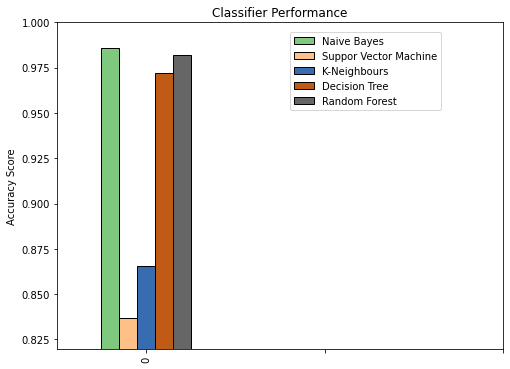

In [39]:
# Plotting of data
accdata.plot(kind='bar', ylim=(0.82,1.0), figsize=(8,6), align='center', colormap="Accent")
plt.xticks(np.arange(3), accdata.index)
plt.ylabel('Accuracy Score')
plt.title('Classifier Performance')
plt.legend(bbox_to_anchor=(0.5, 1), loc=2, borderaxespad=1.)